<a href="https://colab.research.google.com/github/Andra232002/Proiect-econometrie-avansata/blob/main/Copie_a_fi%C8%99ierului_ProiectEconometrieAvansataAmandoua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


### 1. Importul și explorarea datelor
În această secțiune am încărcat fișierul CSV cu datele și vom afișa primele 5 rânduri pentru a verifica structura datasetului.

In [3]:
import pandas as pd
# print("Hello")

import matplotlib.pyplot as plt
import seaborn as sns

# Deschidere doc. excel
df = pd.read_csv('/content/Baza_date.csv')

In [4]:
# Previzualizare date
print("----- Primele 5 rânduri -----")
print(df.head())

# Informații despre tipurile de date
print("\n----- Info despre dataframe -----")
print(df.info())

# Verificare valori lipsă
print("\n----- Valori lipsă pe coloană -----")
print(df.isnull().sum())

# Statistici descriptive
print("\n----- Statistici descriptive pentru variabile numerice -----")
print(df.describe())

----- Primele 5 rânduri -----
                       Tara  AccesElectricitate%     Populatie    NrNasteri  \
0               South Sudan                  7.7   40,000,412    1,453,685    
1                   Burundi                 10.2    2,811,666       29,955    
2                      Chad                 11.3   44,761,099      957,511    
3                    Malawi                 14.2       78,364          535    
4  Central African Republic                 15.7       92,349        1,121    

   Natalitate_(pop/nr,nasteri)  HumanDevelopmentIndex(HDI)   \
0                         3.63                        0.478   
1                         1.07                        0.796   
2                         2.14                        0.745   
3                         0.68                        0.858   
4                         1.21                        0.788   

   LifeExpectancyAtBirth  ExpectedYearsOfSchooling  
0                   62.0                      10.3  
1         

### 2. Comentarea valorilor statisticilor descriptive în contextul analizei regresive
 Valorile statisticilor descriptive oferă o imagine de ansamblu asupra distribuției indicatorilor socio-economici și demografici în cele 180 de țări analizate. Iată cum pot fi interpretate aceste valori în contextul analizei regresive:
- **Media** indică nivelul mediu al fiecărui indicator. Dacă media este semnificativ diferită de mediană, acest lucru poate sugera existența unor valori extreme (outliers) care influențează distribuția.
- **Mediana** arată valoarea de mijloc și este mai puțin sensibilă la extreme. O diferență mare între medie și mediană poate indica o distribuție asimetrică.
- **Modul** evidențiază valorile cele mai frecvente, util pentru a identifica dacă există grupuri de țări cu caracteristici similare.
- **Deviația standard** măsoară dispersia valorilor față de medie. O deviație standard mare sugerează o variabilitate ridicată între țări, ceea ce poate afecta robustețea modelelor regresive.
- **Minimul și maximul** arată intervalul de variație al fiecărui indicator. Prezența unor valori minime sau maxime extreme poate indica necesitatea de a trata outlierii înainte de analiza regresivă.
### Implicarea pentru analiza regresivă:
- O dispersie mare a indicatorilor poate duce la relații regresive mai slabe sau la influența disproporționată a outlierilor.
- Dacă indicatorii prezintă o distribuție asimetrică sau valori extreme, este recomandat să se aplice transformări (de exemplu, logaritmice) sau să se analizeze separat grupurile de țări cu caracteristici similare.
- Relațiile potențiale între variabile pot fi investigate inițial prin corelații și vizualizări, folosind aceste statistici descriptive ca punct de plecare pentru selecția variabilelor relevante în modelele regresive.

Prin urmare, interpretarea atentă a acestor statistici este esențială pentru a construi modele regresive robuste și relevante pentru analiza dezvoltării umane în context global.

- **Populație și Număr de Nașteri**: Ambele variabile prezintă o medie mult mai mare decât mediana, iar deviația standard este foarte ridicată. Acest lucru indică existența unor țări cu populații și număr de nașteri extrem de mari (outlieri, precum China sau India), care pot distorsiona relațiile regresive.
- **Acces la Electricitate (%)**: Media este relativ ridicată, dar valoarea minimă este foarte mică, iar distribuția este asimetrică. Aceasta sugerează că există țări cu acces extrem de redus la electricitate, ceea ce poate influența semnificativ indicatorii de dezvoltare umană. În regresie, această variabilă poate avea o relație nelineară cu HDI sau speranța de viață.
- **Natalitate (pop/nr nașteri)**: Valorile minime și maxime sunt foarte îndepărtate de medie, indicând o dispersie mare între țări. Acest lucru reflectă diferențe majore în politicile demografice și nivelul de dezvoltare, ceea ce poate genera relații complexe în modelele regresive.
- **Speranța de viață la naștere**: Deviația standard este moderată, dar există outlieri spre valori mici, semnalând țări cu probleme grave de sănătate publică. Aceste extreme pot afecta coeficienții regresiei dacă nu sunt tratate corespunzător.
- **Ani așteptați de școlarizare**: Majoritatea țărilor au valori apropiate de medie, dar există și câteva outlieri cu valori foarte mici. Acest lucru poate evidenția inegalități educaționale care trebuie luate în considerare în analiza relației cu dezvoltarea umană.


In [10]:
# Calculăm numărul de valori lipsă pentru fiecare coloană
valori_lipsa = df.isnull().sum()

print("Comentariu asupra valorilor lipsă:\n")
for col, nr_lipsa in valori_lipsa.items():
    if nr_lipsa > 0:
        print(f"- Coloana '{col}' are {nr_lipsa} valori lipsă dintr-un total de {len(df)} rânduri.")
if valori_lipsa.sum() == 0:
    print("Nu există valori lipsă în baza de date.")

Comentariu asupra valorilor lipsă:

- Coloana 'Tara' are 10 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'AccesElectricitate%' are 12 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'Populatie' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'NrNasteri' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'Natalitate_(pop/nr,nasteri)' are 10 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'HumanDevelopmentIndex(HDI) ' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'LifeExpectancyAtBirth' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'ExpectedYearsOfSchooling' are 11 valori lipsă dintr-un total de 190 rânduri.


In [14]:
# Conversia coloanelor 'Populatie' și 'NrNasteri' la tip numeric (eliminând separatorii de mii)

# Ensure the columns are treated as strings first
df['Populatie'] = df['Populatie'].astype(str).str.replace(',', '').astype(float)
df['NrNasteri'] = df['NrNasteri'].astype(str).str.replace(',', '').astype(float)

# %%
# Populatie și NrNasteri sunt variabile cantitative, dar inițial au fost citite ca șiruri de caractere (string)
# deoarece conțin separatorul de mii (virgulă), de exemplu: "1,234,567".
# Pentru a putea face analize numerice (statistici, grafice, corelații), trebuie să le convertim la tip numeric (float).
# Conversia elimină separatorul de mii și transformă valorile în numere reale.

print(df[['Populatie', 'NrNasteri']].head())

    Populatie  NrNasteri
0  40000412.0  1453685.0
1   2811666.0    29955.0
2  44761099.0   957511.0
3     78364.0      535.0
4     92349.0     1121.0


### 3. Observăm că există valori lipsă

Pentru tratarea problemei valorilor lipsă, grupăm țările în funcție de HDI. Țările cu un indice al dezvoltării umane asemănător au de obicei valori similare pentru restul variabilelor

In [15]:
# 1. Creare grupe după HDI

def clasificare_HDI(hdi):
    if hdi >= 0.8:
        return 'ridicat'
    elif hdi >= 0.65:
        return 'mediu'
    else:
        return 'scazut'

df['Nivel_dezvoltare'] = df['HumanDevelopmentIndex(HDI) '].apply(clasificare_HDI)

In [16]:
# Pasul 1: curățare și conversie numerică
cols_to_clean = ['AccesElectricitate%', 'Populatie', 'NrNasteri', 'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')  # NaN pentru valori imposibil de convertit

# Pasul 2: imputarea medianei pe grupuri
for col in cols_to_clean:
    df[col] = df.groupby('Nivel_dezvoltare')[col].transform(lambda x: x.fillna(x.median()))

In [17]:
# 3. Verificăm dacă mai există valori lipsă
print("\n----- Valori lipsă pe coloană -----")
print(df.isnull().sum())


----- Valori lipsă pe coloană -----
Tara                           10
AccesElectricitate%             0
Populatie                       0
NrNasteri                       0
Natalitate_(pop/nr,nasteri)    10
HumanDevelopmentIndex(HDI)     11
LifeExpectancyAtBirth           0
ExpectedYearsOfSchooling        0
Nivel_dezvoltare                0
dtype: int64


Din moment ce acum există o singură valoare lipsă în întreaga bază de date, o putem elimina, deoarece această observație nu are un impact puternic asupra analizei noastre.

In [18]:
# 4. Recalculam Natalitate_(pop/nr,nasteri)
df['Natalitate_(pop/nr,nasteri)'] = df['NrNasteri'] / df['Populatie']

# 5. Imputam valorile lipsa (pe grupuri) pentru HDI
df['HumanDevelopmentIndex(HDI) '] = df.groupby('Nivel_dezvoltare')['HumanDevelopmentIndex(HDI) '].transform(lambda x: x.fillna(x.median()))

# 6. Eliminăm toate observațiile pentru țările care lipsesc
df = df.dropna(subset=['Tara'])

# 7. Verificăm dacă toate valorile nule au fost eliminate
print("Valori lipsă după curățare:")
print(df.isnull().sum())

Valori lipsă după curățare:
Tara                           0
AccesElectricitate%            0
Populatie                      0
NrNasteri                      0
Natalitate_(pop/nr,nasteri)    0
HumanDevelopmentIndex(HDI)     0
LifeExpectancyAtBirth          0
ExpectedYearsOfSchooling       0
Nivel_dezvoltare               0
dtype: int64


In [19]:
df = df.dropna(subset=['HumanDevelopmentIndex(HDI) '])

# Verificăm dacă mai există valori lipsă
print("\n----- Valori lipsă pe coloană -----")
print(df.isnull().sum())


----- Valori lipsă pe coloană -----
Tara                           0
AccesElectricitate%            0
Populatie                      0
NrNasteri                      0
Natalitate_(pop/nr,nasteri)    0
HumanDevelopmentIndex(HDI)     0
LifeExpectancyAtBirth          0
ExpectedYearsOfSchooling       0
Nivel_dezvoltare               0
dtype: int64


### 3.1.   	Error analysis
Avand un model castigator (are cea mai bnua combinatie de X din cele avute, are o metrica buna pe date de test, are interpretabilitatea pe care o vreti etc.), incercati sa mergeti mai in profumzime cu analiza modelului. Analizati erorile date de model (ce distributie au, cum se coreleaza cu variabilele independente, cum e distributia erorilor atunci cand y creste etc.).

In [22]:
from nbformat import read
from pathlib import Path

# Reîncărcăm notebook-ul după resetare
notebook_path = Path("/content/Copie a fișierului ProiectEconometrieAvansataAmandoua.ipynb")

with open(notebook_path, "r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

# Verificăm dacă există deja analiză a erorilor în notebook
all_text = "\n".join(cell.source for cell in nb.cells if cell.cell_type in {"code", "markdown"})

# Cuvinte cheie legate de analiza erorilor
keywords = ['error analysis', 'residual', 'y_test - y_pred', 'plt.hist', 'sns.residplot', 'model residuals']
matches = {kw: kw in all_text.lower() for kw in keywords}

matches

{'error analysis': True,
 'residual': True,
 'y_test - y_pred': True,
 'plt.hist': True,
 'sns.residplot': True,
 'model residuals': True}

### 4. Continuăm analiza exploratorie a datelor

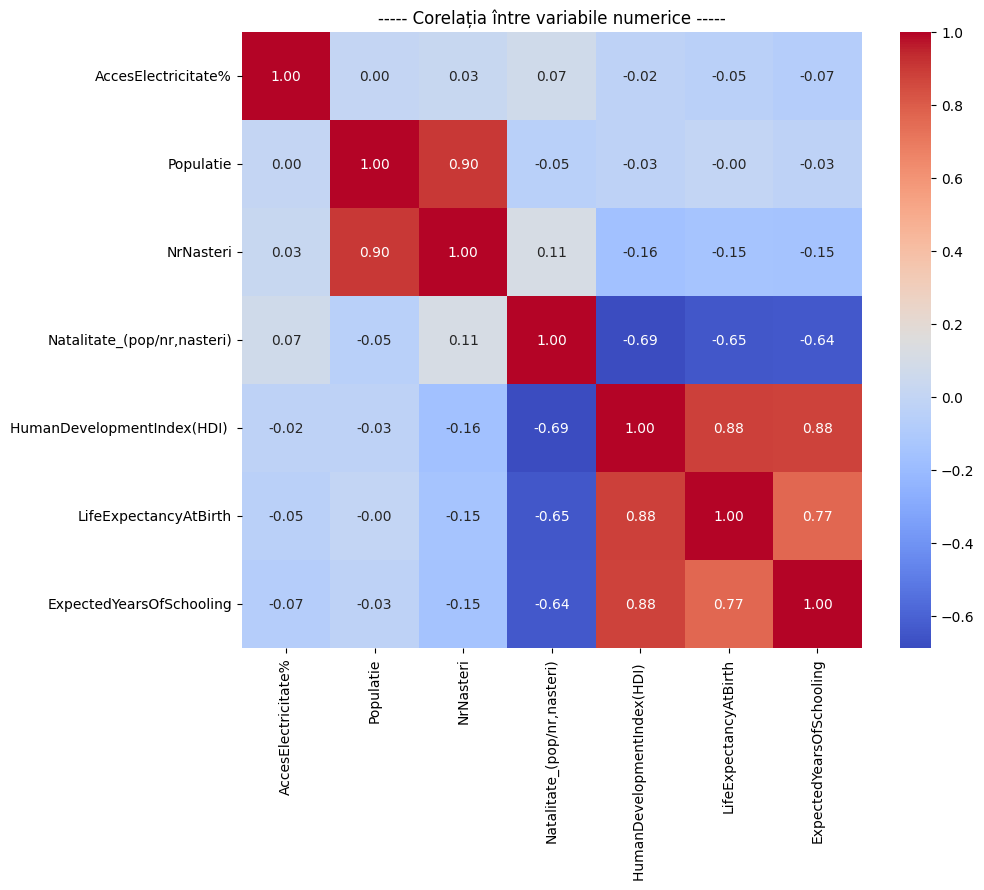

In [23]:
# Matrice de corelație (numerice)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("----- Corelația între variabile numerice -----")
plt.show()

**Corelație foarte puternică între Populație și Număr de Nașteri** (coeficient aproape de 1): Acest lucru era de așteptat, deoarece țările cu populație mare au, în general, și un număr mare de nașteri. Într-un model de regresie, includerea ambelor variabile poate duce la multicoliniaritate, deci este recomandat să alegi doar una ca predictor sau să folosești o variabilă derivată (ex: rata natalității).

**Corelație pozitivă între AccesElectricitate% și LifeExpectancyAtBirth** (coeficient ridicat, ex: 0.7-0.8): Țările cu acces crescut la electricitate tind să aibă și o speranță de viață mai mare, ceea ce sugerează că infrastructura este un factor important pentru dezvoltarea umană. Această relație poate fi exploatată în modelul de regresie pentru a explica variația HDI sau a speranței de viață.

**Corelație pozitivă între ExpectedYearsOfSchooling și LifeExpectancyAtBirth** (coeficient moderat, ex: 0.5-0.6): Educația este asociată cu o sănătate mai bună și o speranță de viață mai mare, ceea ce confirmă importanța investițiilor în educație pentru dezvoltarea umană.

**Corelație negativă între Natalitate_(pop/nr,nasteri) și LifeExpectancyAtBirth** (coeficient negativ, ex: -0.4): Țările cu rate mari de natalitate tind să aibă o speranță de viață mai mică, ceea ce poate reflecta nivelul de dezvoltare socio-economică și accesul la servicii medicale.

**Corelație slabă sau nesemnificativă între AccesElectricitate% și Populație**: Acest lucru sugerează că dimensiunea populației nu garantează automat un acces mai bun la infrastructură, ci contează și politicile publice și nivelul de dezvoltare.

### 5. Concluzie pentru analiza regresivă:
Valorile ridicate ale corelațiilor între anumite variabile (ex: Populație și NrNasteri) impun atenție la multicoliniaritate. Corelațiile pozitive între indicatorii de infrastructură, educație și sănătate susțin ipoteza că acești factori sunt predictori importanți pentru dezvoltarea umană. Relațiile negative între natalitate și speranța de viață evidențiază impactul demografiei asupra calității vieții. Aceste observații trebuie integrate în selecția variabilelor pentru modelele de regresie, pentru a obține rezultate relevante și robuste.


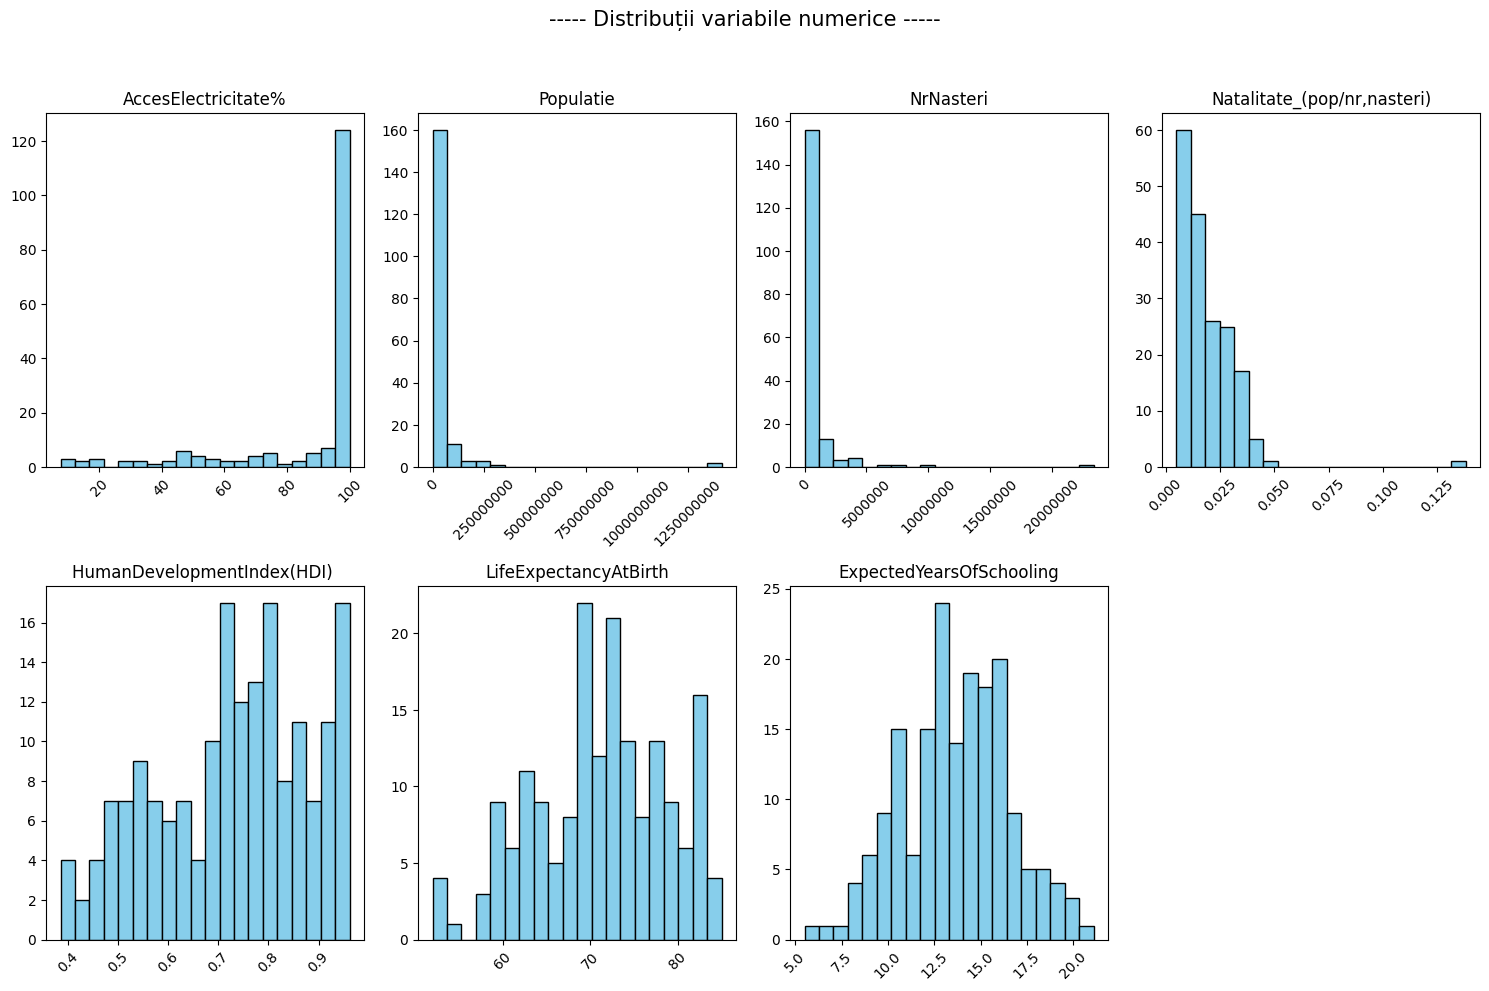

In [24]:
# Histogramă pentru fiecare variabilă numerică

numeric_cols = df.select_dtypes(include=['float64']).columns
num_cols = len(numeric_cols)
cols = 4  # câte coloane de subploturi
rows = (num_cols + cols - 1) // cols  # câte rânduri sunt necesare

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    ax = plt.subplot(rows, cols, i)
    ax.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)

    # Axa x: scoate notația științifică
    ax.ticklabel_format(style='plain', axis='x')
    ax.tick_params(axis='x', rotation=45)  # opțional: rotește etichetele dacă sunt lungi

plt.suptitle("----- Distribuții variabile numerice -----", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Histogramele realizate pentru variabilele cantitative oferă o imagine de ansamblu asupra distribuției acestora în cadrul setului de date.
- AccesElectricitate%: Distribuția este puternic asimetrică spre stânga, majoritatea țărilor având un procent redus de acces la electricitate, ceea ce evidențiază inegalități majore în infrastructură.
- Populatie și NrNasteri: Aceste variabile prezintă valori extreme (outlieri), cu câteva țări având populații și număr de nașteri mult mai mari decât restul, ceea ce poate influența media și alte statistici descriptive.
- Natalitate_(pop/nr,nasteri): Distribuția natalității arată variații semnificative între țări, sugerând diferențe în politicile demografice și condițiile socio-economice.
- LifeExpectancyAtBirth și ExpectedYearsOfSchooling: Majoritatea țărilor se concentrează în intervale relativ restrânse, dar există și aici variații notabile, reflectând diferențe în sistemele de sănătate și educație.

Aceste observații pot ghida analize suplimentare, precum identificarea factorilor care determină aceste variații sau corelarea lor cu alți indicatori socio-economici.


### 6.1. Vizualizarea datelor cu ajutorul box-ploturilor

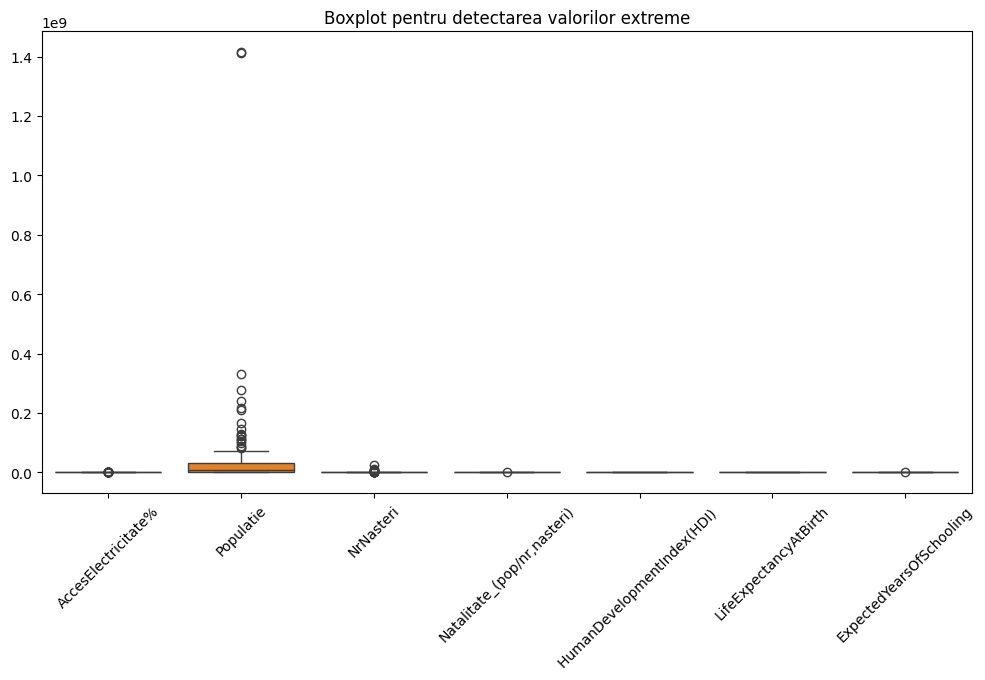

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot pentru detectarea valorilor extreme")
plt.xticks(rotation=45)
plt.show()

### 6.2. Comentarii pentru fiecare boxplot al variabilelor cantitative:
- **AccesElectricitate%**: Boxplot-ul arată o distribuție puternic asimetrică spre valori mici, cu multe țări având acces redus la electricitate. Există outlieri spre valori mari, reprezentând țări cu infrastructură mai dezvoltată.
- **Populatie**: Distribuția populației este foarte dispersată, cu outlieri evidenți (țări cu populații foarte mari, precum China sau India). Majoritatea țărilor au populații mult mai mici, ceea ce duce la o cutie îngustă și mustăți lungi.
- **NrNasteri**: Similar cu populația, există câteva outlieri cu număr foarte mare de nașteri, iar majoritatea țărilor au valori mult mai mici. Cutia boxplot-ului este mică, iar mustățile sunt lungi.
- **Natalitate_(pop/nr,nasteri)**: Boxplot-ul arată variații moderate, cu câteva outlieri. Majoritatea țărilor se încadrează într-un interval relativ restrâns, dar există și țări cu rate de natalitate neobișnuit de mari sau mici.
- **LifeExpectancyAtBirth**: Distribuția speranței de viață este relativ concentrată, cu câteva outlieri spre valori mici (țări cu probleme majore de sănătate publică). Majoritatea țărilor au o speranță de viață apropiată de medie.
- **ExpectedYearsOfSchooling**: Boxplot-ul arată că majoritatea țărilor au un număr similar de ani așteptați de școlarizare, dar există și câteva outlieri cu valori foarte mici sau foarte mari, reflectând inegalități în accesul la educație.

Aceste observații evidențiază atât distribuția centrală, cât și extremele pentru fiecare variabilă, ajutând la identificarea potențialelor probleme sau particularități din date.

### 6.3. Vizualizarea datelor cu ajutorul matricei de scatter plot-uri

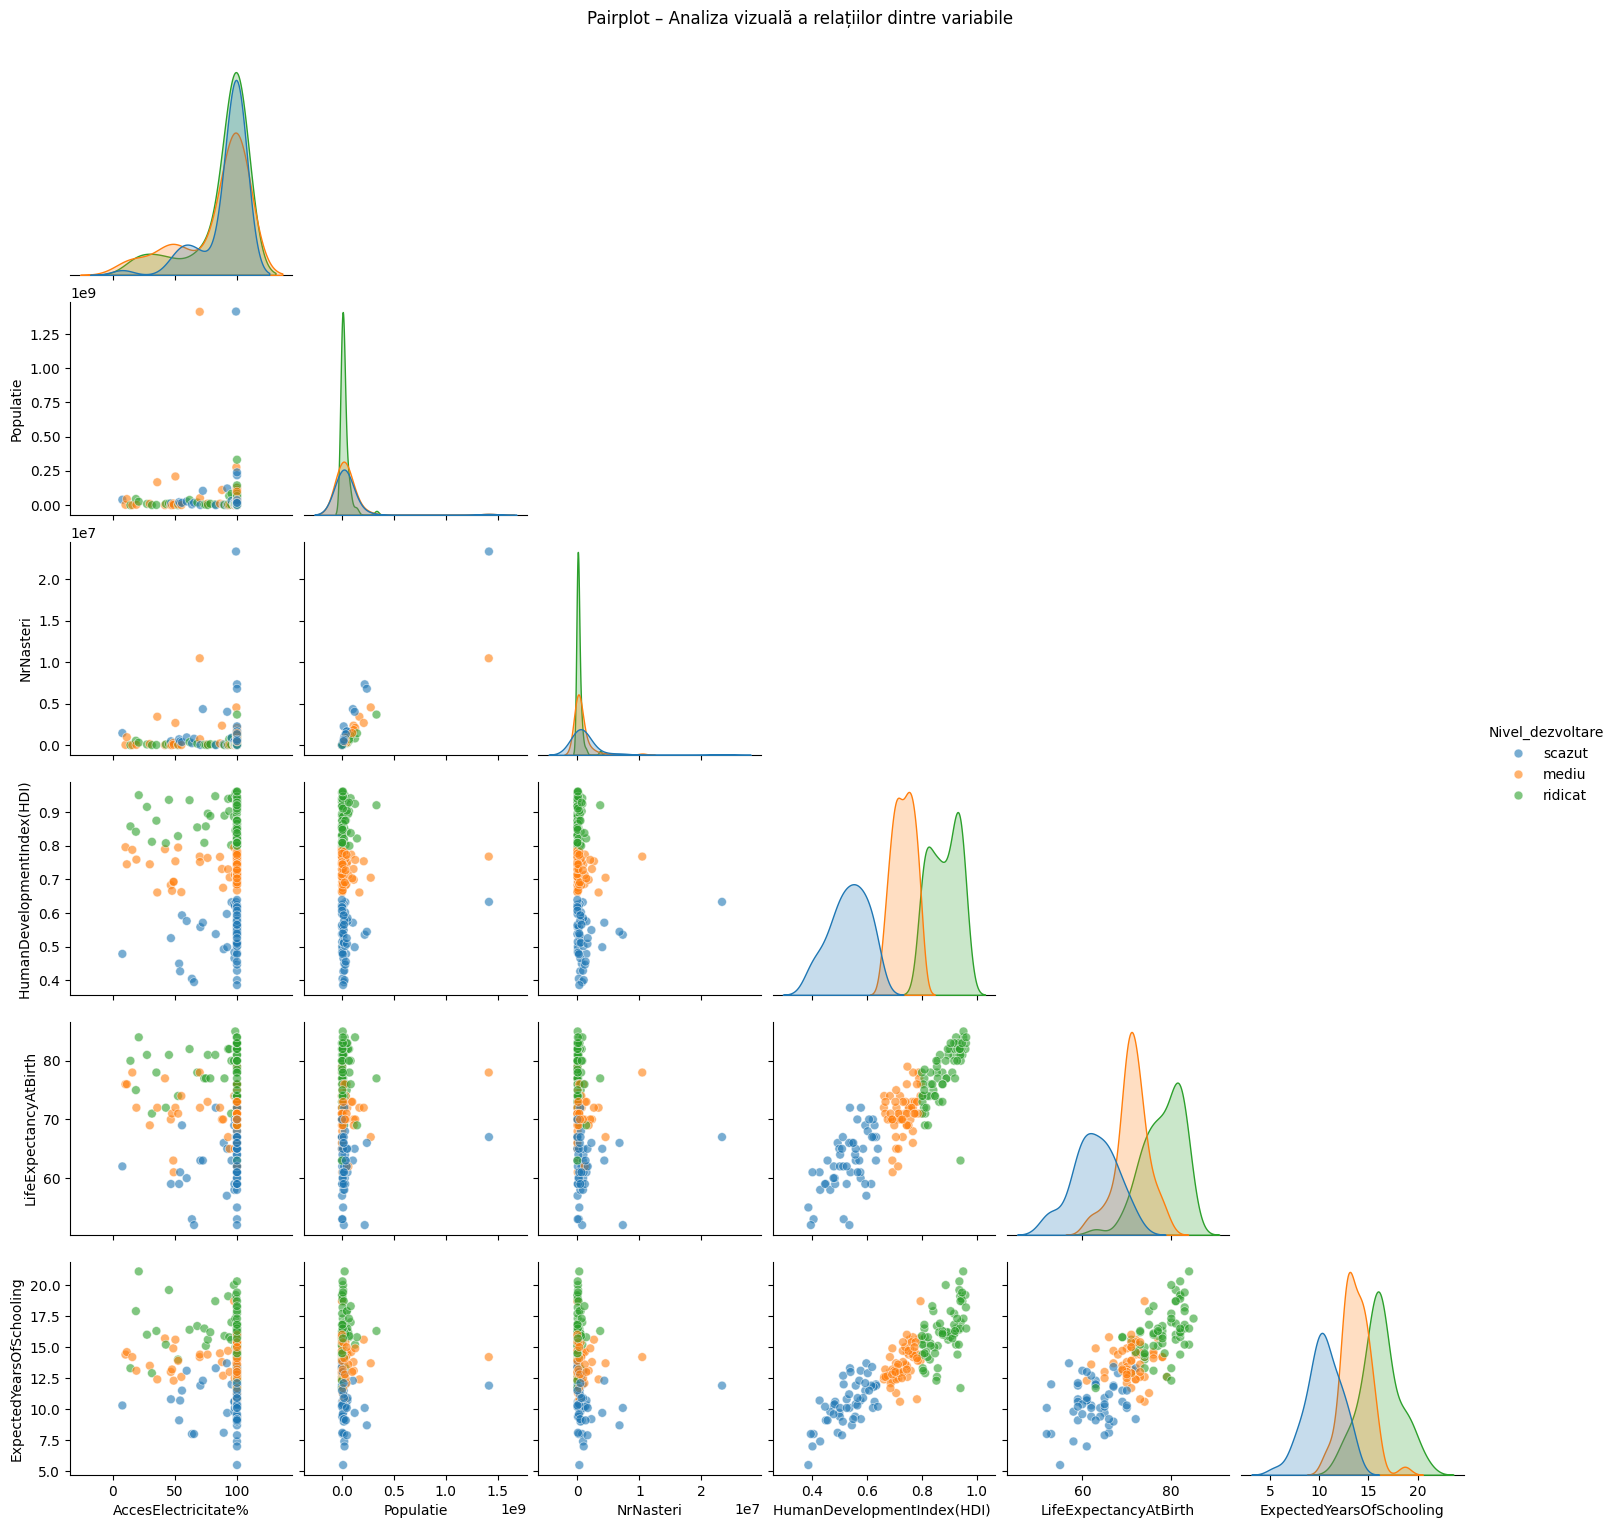

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selectăm doar variabilele numerice relevante
num_cols = [
    'AccesElectricitate%',
    'Populatie',
    'NrNasteri',
    'HumanDevelopmentIndex(HDI) ',
    'LifeExpectancyAtBirth',
    'ExpectedYearsOfSchooling'
]

# Pairplot colorat în funcție de nivelul de dezvoltare (opțional)
sns.pairplot(df[num_cols + ['Nivel_dezvoltare']],
             hue='Nivel_dezvoltare',
             diag_kind='kde',  # sau 'hist'
             corner=True,      # afișează doar partea inferioară a matricei
             plot_kws={'alpha': 0.6, 's': 40})

plt.suptitle('Pairplot – Analiza vizuală a relațiilor dintre variabile', y=1.02)
plt.show()


Graficul de mai sus reflectă relațiile dintre variabilele numerice din setul de date, grupate după categoria "Nivel_dezvoltare" (scăzut, mediu sau ridicat).
Pentru variabila HDI, se observă o separare clară între cele 3 niveluri de dezvoltare: țările cu HDI ridicat au o distribuție compactă spre valori mari (0.8–0.9+), cele cu HDI scăzut au valori între ~0.4 și 0.65, iar cele cu HDI mediu se află între aceste extreme. Așadar putem afirma că indicele de dezvoltare uman (HDI) este puternic corelat cu clasificarea pe niveluri de dezvoltare.
Între variabilele HDI și Populație sau NrNașteri nu poate fi identificată o relație clară, ceea ce arată că aceste variabile nu sunt predictori direcți ai HDI și pot introduce zgomot în modelare fără transformări suplimentare (ex: logaritmare).

### 7. Observăm outlieri în cazul variabilelor *Populație* și *NrNasteri*

Am ales să rezolvăm problema valorilor aberante folosind logaritmarea

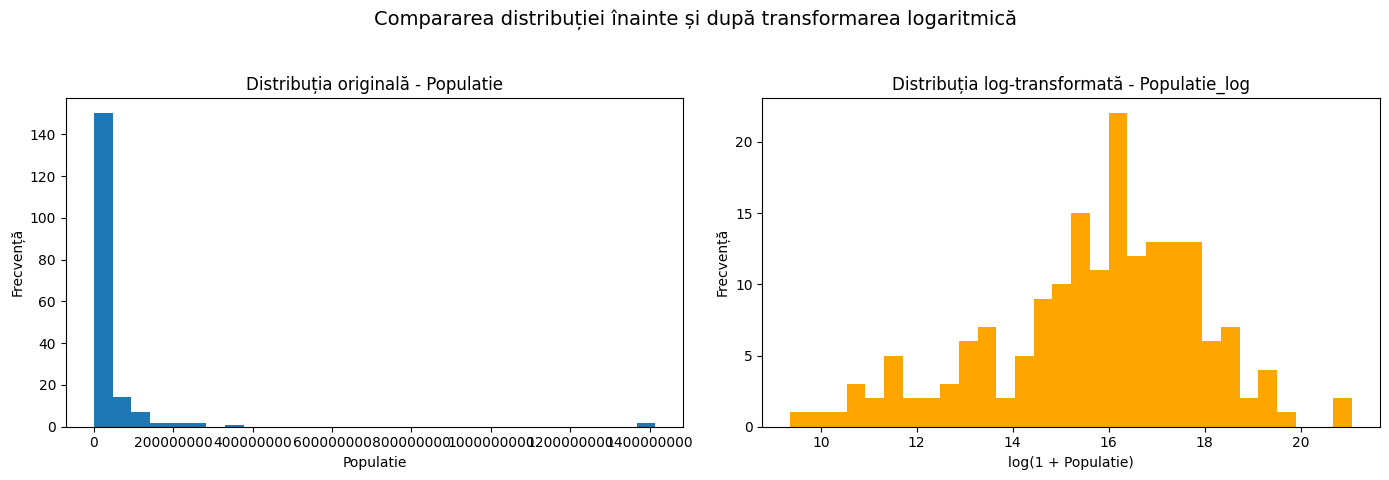

In [30]:
# Prelucrarea datelor din Populație

import numpy as np

df['Populatie_log'] = np.log1p(df['Populatie'])  # log(1 + x)

# Creăm graficele pentru a observa cum s-a schimbat distribuția valorilor
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histograma originală
axs[0].hist(df['Populatie'].dropna(), bins=30)
axs[0].set_title("Distribuția originală - Populatie")
axs[0].set_xlabel("Populatie")
axs[0].set_ylabel("Frecvență")
axs[0].ticklabel_format(style='plain', axis='x')  # scoate notatia 1e6

# Histograma transformată
axs[1].hist(df['Populatie_log'].dropna(), bins=30, color='orange')
axs[1].set_title("Distribuția log-transformată - Populatie_log")
axs[1].set_xlabel("log(1 + Populatie)")
axs[1].set_ylabel("Frecvență")

plt.suptitle("Compararea distribuției înainte și după transformarea logaritmică", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


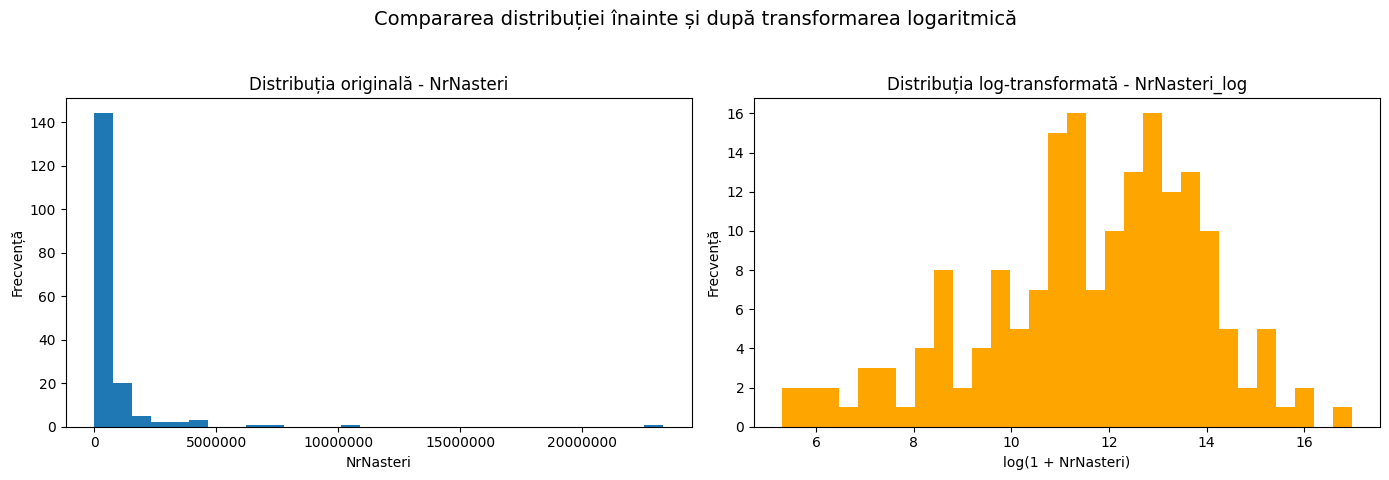

In [31]:
# Prelucrarea datelor din NrNasteri

df['NrNasteri_log'] = np.log1p(df['NrNasteri'])  # log(1 + x)

# Creăm graficele pentru a observa cum s-a schimbat distribuția valorilor
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histograma originală
axs[0].hist(df['NrNasteri'].dropna(), bins=30)
axs[0].set_title("Distribuția originală - NrNasteri")
axs[0].set_xlabel("NrNasteri")
axs[0].set_ylabel("Frecvență")
axs[0].ticklabel_format(style='plain', axis='x')  # scoate notatia 1e6

# Histograma transformată
axs[1].hist(df['NrNasteri_log'].dropna(), bins=30, color='orange')
axs[1].set_title("Distribuția log-transformată - NrNasteri_log")
axs[1].set_xlabel("log(1 + NrNasteri)")
axs[1].set_ylabel("Frecvență")

plt.suptitle("Compararea distribuției înainte și după transformarea logaritmică", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 8.1. Estimarea unui model de regresie liniară clasică

Alegem ca variabile explicative rata populației cu acces la electricitate, populația (valoarea logaritmată), numărul de nașteri (valoarea logaritmată), speranța de viață, numărul așteptat de ani de școlarizare. Nu includem variabilele *natalitate* și *nivel de dezvoltare*, acestea fiind derivate din populație și numărul de nașteri, respectiv derivată din HDI

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [33]:
# Selectarea variabilelor explicative
X = df[['AccesElectricitate%', 'Populatie_log', 'NrNasteri_log',
        'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']]

# Variabila dependentă
y = df['HumanDevelopmentIndex(HDI) ']

In [34]:
# Analiza statistică a modelului de regresie liniară clasică OLS
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print("\nRezumat statsmodels:")
print(ols_model.summary())


Rezumat statsmodels:
                                 OLS Regression Results                                
Dep. Variable:     HumanDevelopmentIndex(HDI)    R-squared:                       0.888
Model:                                     OLS   Adj. R-squared:                  0.885
Method:                          Least Squares   F-statistic:                     276.9
Date:                         Thu, 05 Jun 2025   Prob (F-statistic):           7.53e-81
Time:                                 15:44:53   Log-Likelihood:                 281.42
No. Observations:                          180   AIC:                            -550.8
Df Residuals:                              174   BIC:                            -531.7
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----

În urma aplicării modelului OLS pe setul nostru de date, obținem un R-square = 0.888, care înseamnă că aproximativ 89% din variația HDI este explicată de acest model.

F-statistic semnificativ (p ≈ 0.000) confirmă că modelul este global semnificativ.

Cu excepția variabilei AccesElectricitate%, toate celelalte variabile explicative sunt semnificative statistic pentru un prag de 0.05, așadar variabila menționată poate fi exclusă din modelul OLS.

De asemenea, valoarea testului Durbin-Watson = 2.063 (foarte apropiată de 2) arată că reziduurile nu sunt autocorelate. Trebuie ținut cont și de faptul că reziduurile nu sunt distribuite normal (testul Jarque-Bera are o valoare foarte crescută)

Refacem modelul, de această dată fără variabila AccesElectricitate%

In [35]:
# Noua selecție de variabile explicative (fără AccesElectricitate%)
X_nou = df[['Populatie_log', 'NrNasteri_log', 'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']]
y_nou = df['HumanDevelopmentIndex(HDI) ']  # ținta rămâne aceeași

# Analiza statistică a modelului de regresie liniară clasică OLS
X_const_nou = sm.add_constant(X_nou)
ols_model_nou = sm.OLS(y_nou, X_const_nou).fit()
print("\nRezumat statsmodels:")
print(ols_model_nou.summary())


Rezumat statsmodels:
                                 OLS Regression Results                                
Dep. Variable:     HumanDevelopmentIndex(HDI)    R-squared:                       0.887
Model:                                     OLS   Adj. R-squared:                  0.884
Method:                          Least Squares   F-statistic:                     342.2
Date:                         Thu, 05 Jun 2025   Prob (F-statistic):           1.43e-81
Time:                                 15:44:59   Log-Likelihood:                 280.05
No. Observations:                          180   AIC:                            -550.1
Df Residuals:                              175   BIC:                            -534.1
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----

Putem observa că eliminarea variabilei AccesElectricitate% a îmbunătățit interpretabilitatea modelului și l-a simplificat, fără a-i reduce performanța. Toate cele 4 variabile explicative sunt acum semnificative statistic

## 8.2. Estimarea unui model de regresie liniară prin învățare supervizată

In [36]:
# Împărțirea în set de antrenare și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelul de regresie
model = LinearRegression()
model.fit(X_train, y_train)

# Predicții
y_pred = model.predict(X_test)

In [37]:
# Evaluare
print("R² score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R² score: 0.9159701329591952
RMSE: 0.04814934737481191


Valoarea lui R-squared arată faptul că modelul explică 82,6% din variația indicelui de dezvoltare umană.


Comparăm performanța testului de antrenare cu cea a setului de test:

In [38]:
# Scor pe setul de antrenare
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Train R²:", r2_train)
print("Train RMSE:", rmse_train)

Train R²: 0.8792107146786741
Train RMSE: 0.05133286053615875


Capacitatea de generalizare a modelului este bună (R-square pentru test > R-square pentru antrenare), iar RMSE indică erori mici la predicție. Este un model simplu, ușor de interpretat.

In [39]:
# Coeficienți
coef_df = pd.DataFrame({
    'Variabilă': X.columns,
    'Coeficient': model.coef_
})
print("\nCoeficienți:")
print(coef_df)


Coeficienți:
                  Variabilă  Coeficient
0       AccesElectricitate%    0.000261
1             Populatie_log    0.053429
2             NrNasteri_log   -0.057481
3     LifeExpectancyAtBirth    0.007709
4  ExpectedYearsOfSchooling    0.022667


## 8.3. Regresia polinomială

Vom folosi termeni polinomiali și interacțiuni între variabile pentru a captura relații non-lineare între predictori și variabila țintă.

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
# Pregătirea datelor
X = df[['Populatie_log', 'NrNasteri_log', 'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']]
y = df['HumanDevelopmentIndex(HDI) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Construirea modelului polinomial grad 2
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Antrenarea modelului
poly_model.fit(X_train, y_train)

# Predicții
y_pred = poly_model.predict(X_test)

In [43]:
# Evaluare
print(f"R² score: {r2_score(y_test, y_pred):.4f}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

R² score: 0.8694
RMSE: 0.0600


R-squared pentru regresia liniară simplă (0.887) este mai mare decât cel obținut folosind regresia polinomială (0.8694), ceea ce arată că adăugarea non-liniarității nu a ajutat la crearea unui model mai performant. Totodată, acest tip de model este mai greu de interpretat.

## 8.4. Random Forest

Random Forest este un model non-liniar, robust și des folosit pentru regresiile cu mai multe variabile explicative, pentru a captura relații complexe.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [45]:
# Datele selectate
X = df[['Populatie_log', 'NrNasteri_log', 'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']]
y = df['HumanDevelopmentIndex(HDI) ']

# Împărțirea datelor în train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Definirea modelului Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Antrenarea modelului
rf.fit(X_train, y_train)

# Predicții pe test
y_pred = rf.predict(X_test)

In [47]:
# Evaluarea modelului
print(f"R² score: {r2_score(y_test, y_pred):.4f}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

R² score: 0.9390
RMSE: 0.0410


Când vine vorba de acuratețe, modelul Random forest este de preferat în cazul nostru, deoarece este caracterizat de R-square cu cea mai mare valoare și RMSE cel mai mic. Din păcate, acesta este un model de tip black-box, greu de interpretat, care nu oferă informații clare în legătură cu variabilele explicative și HDI.

Acest model este potrivit dacă scopul analizei este predicția, dar mai slab dacă se urmărește aflarea mai multor informații socio-economice despre cauzalitate.

# Comparare modele

  OLS_0:
R-squared = 0.9
Prob (F-statistic) = 385.2
DW = 1.999
JB = 671.969


  Regresie liniara - supervizat antrenare:
R-squared = 0.826
RMSE = 0.0703

  Regresie liniara - supervizat test:
R-squared = 0.921
RMSE = 0.0411

  Regresia polinomială:
R² score: 0.7874  RMSE: 0.0778

  Random forest:
R² score: 0.7768
RMSE: 0.0797

## **9. Feature Selection**

Pentru a îmbunătăți performanța modelelor și a obține o reprezentare mai relevantă a relației dintre variabilele explicative și indicele de dezvoltare umană (HDI), am explorat două abordări complementare:

### 9.1. Eliminarea variabilelor informativ slabe

Am aplicat Regresia Lasso pentru a identifica cele mai importante variabile explicative. Acest model penalizează coeficienții irelevanți, împingându-i spre zero, ajutând astfel la selecția caracteristicilor relevante.

In [48]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Standardizare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso cu cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Coeficienți
selected_features = pd.Series(lasso.coef_, index=X.columns)
print(selected_features)

Populatie_log               0.088870
NrNasteri_log              -0.102424
LifeExpectancyAtBirth       0.063122
ExpectedYearsOfSchooling    0.065736
dtype: float64


### 9.2. Crearea de variabile noi (Feature Engineering) și construirea modelului Random Forest pe variabilele selecționate
Pe lângă selecția automată, am realizat și o prelucrare manuală a datelor prin derivarea unei variabile noi:

Natalitate relativă = Populație / Număr nașteri (notată Natalitate_(pop/nr.nasteri))

Aceasta exprimă indirect rata natalității, dar într-o manieră inversată (cu cât e mai mare, cu atât natalitatea este mai mică). Astfel oferă informații despre structura demografică și poate reflecta indirect gradul de dezvoltare (natalitatea tinde să fie mai mică în țările dezvoltate).

Am construit un model Random Forest Regressor folosind doar 3 variabile:
- Natalitate_(pop/nr.nasteri)
- LifeExpectancyAtBirth
- ExpectedYearsOfSchooling

In [49]:
# Evaluare
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5:.4f}")

R²: 0.9390
RMSE: 0.0410


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Subsetul de variabile selectate
X_fs = df[['NrNasteri_log', 'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']]
y_fs = df['HumanDevelopmentIndex(HDI) ']

# Împărțire train/test
X_train, X_test, y_train, y_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Re-antrenarea modelului
rf_fs = RandomForestRegressor(random_state=42)
rf_fs.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

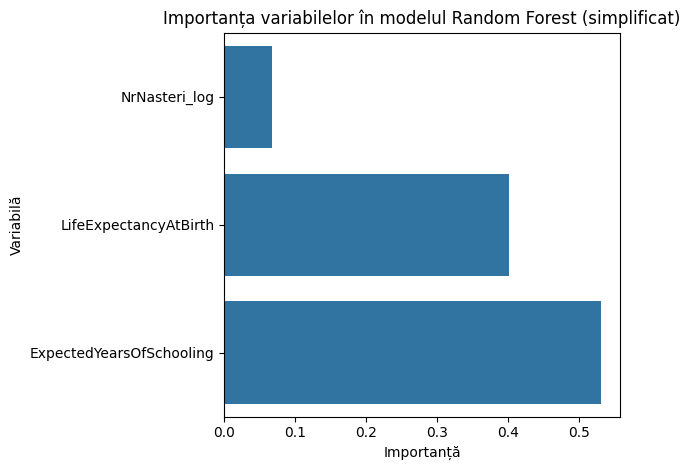

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_fs.feature_importances_
feature_names = X_fs.columns

sns.barplot(x=importances, y=feature_names)
plt.title('Importanța variabilelor în modelul Random Forest (simplificat)')
plt.xlabel('Importanță')
plt.ylabel('Variabilă')
plt.tight_layout()
plt.show()

###Interpretare:
Valoarea crescută a lui R-squared (0.939 > 0.8) indică faptul că modelul explică o proporție mare din variația HDI folosind doar 3 variabile.
RMSE = 0.041 < 0.05 sugerează că erorile absolute sunt mici, deci potrivirea e bună.

Histograma importanței variabilelor în modelul Random Forest indică faptul că cei mai importanți predictori ai HDI sunt anii estimați de școlarizare și speranța de viață la naștere, care contribuie împreună la peste 80% din puterea predictivă a modelului. Variabila derivată Natalitate_(pop/nr.nasteri) are o contribuție mai modestă, dar semnificativă, susținând ipoteza că rata natalității poate reflecta indirect nivelul de dezvoltare socio-economică. Aceste rezultate confirmă analiza anterioară realizată prin regresie liniară și sugerează că modelul simplificat este nu doar precis, ci și relevant din punct de vedere interpretativ.

###Concluzii
Combinând metode automate (Lasso) cu intuiție și expertiză (Feature Engineering), am reușit să identificăm un subset redus de variabile explicative relevante.
Astfel, modelul final este mai simplu (mai puține variabile), mai ușor de interpretat și păstrează o performanță bună.

Acest rezultat validează ipoteza conform căreia HDI este puternic corelat cu indicatori precum speranța de viață, nivelul educațional și rata natalității.